In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [7]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [8]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [9]:
df.shape

(300698, 53)

In [10]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [12]:
df.columns = df.columns.str.replace (" ","_").str.lower()

In [13]:
nyc_dataset = df[['unique_key','created_date','closed_date','agency_name','complaint_type','descriptor','location_type','incident_zip','incident_address','street_name','cross_street_1','cross_street_2','address_type','city','status','due_date','resolution_description','resolution_action_updated_date','community_board','borough','x_coordinate_(state_plane)','y_coordinate_(state_plane)','park_borough','latitude','longitude','location']]

In [14]:
nyc_dataset.duplicated().sum()

0

In [15]:
nyc_dataset.isna().sum()

unique_key                            0
created_date                          0
closed_date                        2164
agency_name                           0
complaint_type                        0
descriptor                         5914
location_type                       131
incident_zip                       2615
incident_address                  44410
street_name                       44410
cross_street_1                    49279
cross_street_2                    49779
address_type                       2815
city                               2614
status                                0
due_date                              3
resolution_description                0
resolution_action_updated_date     2187
community_board                       0
borough                               0
x_coordinate_(state_plane)         3540
y_coordinate_(state_plane)         3540
park_borough                          0
latitude                           3540
longitude                          3540


In [16]:
df['descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [17]:
nyc_dataset.to_csv('Nyc_cleaned.csv',index=False)

In [19]:
nyc = pd.read_csv('Nyc_cleaned.csv',parse_dates=['created_date','closed_date','resolution_action_updated_date'])
nyc.head(3)

,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,latitude,longitude,location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,The Police Department responded to the complai...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,The Police Department responded and upon arriv...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [20]:
nyc['request_closing_time_hrs'] = nyc['closed_date'].values - nyc['created_date'].values
nyc['request_closing_time_mins'] = nyc['request_closing_time_hrs']/np.timedelta64(1,'m')

In [21]:
nyc.head()

,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,latitude,longitude,location,request_closing_time_hrs,request_closing_time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,207.033333


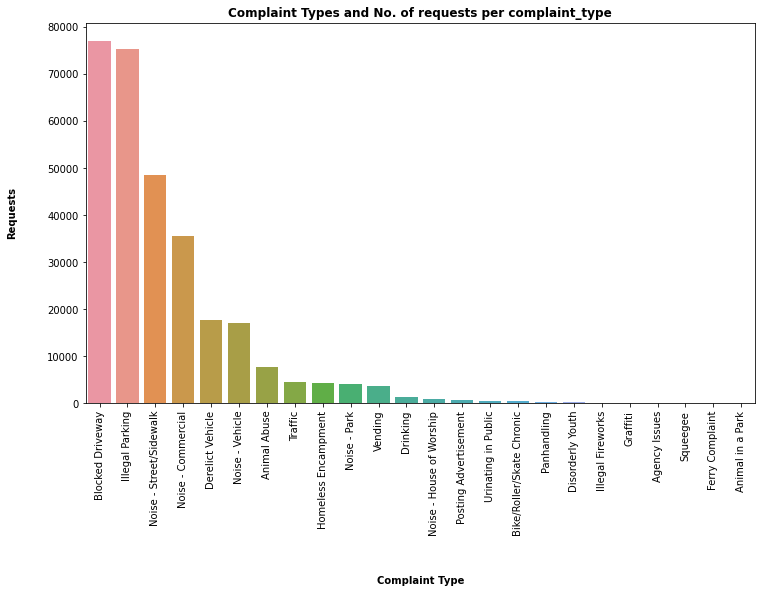

In [22]:
nyc['city'] = nyc['city'].str.lower().str.replace(" ","_")
txt={'weight':'bold'}
plt.figure (figsize=(12,7))
sns.countplot (x='complaint_type',data=nyc,order=nyc['complaint_type'].value_counts().index)
plt.xticks (rotation=90)
plt.title ("Complaint Types and No. of requests per complaint_type",fontdict=txt)
plt.xlabel ('Complaint Type',fontdict=txt,labelpad=40)
plt.ylabel ('Requests',fontdict=txt,labelpad=30)
plt.show()

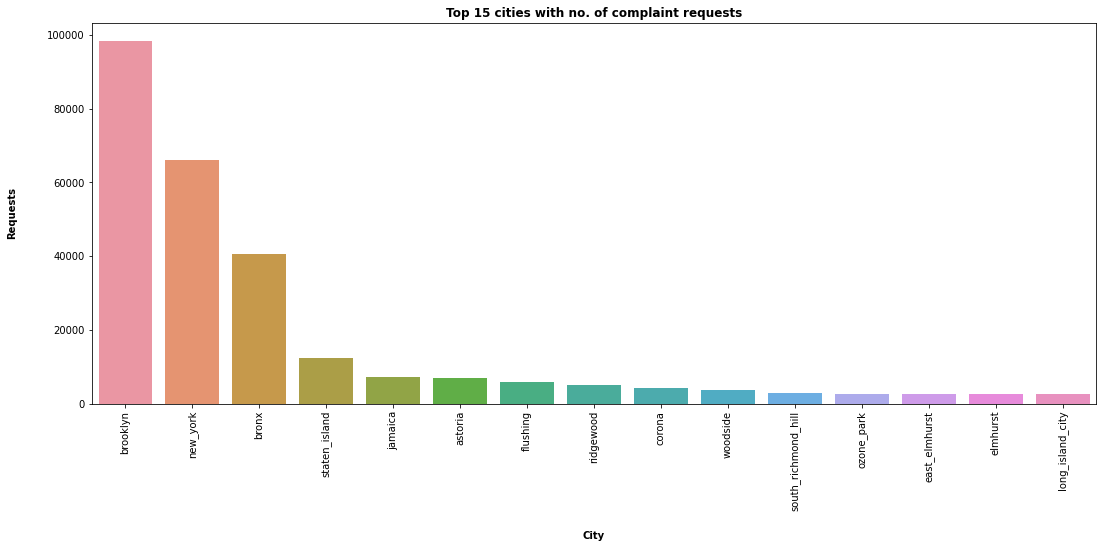

In [23]:
city_top15 = nyc['city'].value_counts().head(15)
top15 = city_top15.index
txt={'weight':'bold'}
plt.figure (figsize=(18,7))
sns.countplot (x='city',data=nyc[nyc.city.isin(top15)],order=top15)
plt.title ("Top 15 cities with no. of complaint requests",fontdict=txt)
plt.xlabel ('City',fontdict=txt,labelpad=20)
plt.xticks (rotation=90)
plt.ylabel ('Requests',fontdict=txt,labelpad=30)
plt.show()

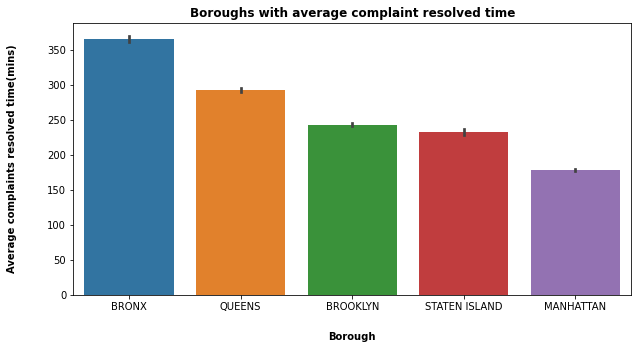

In [24]:
txt={'weight':'bold'}
plt.figure(figsize=(10,5))
sns.barplot (x='borough',y='request_closing_time_mins',data=nyc,order=['BRONX','QUEENS','BROOKLYN','STATEN ISLAND','MANHATTAN'])
plt.title ("Boroughs with average complaint resolved time",fontdict=txt)
plt.xlabel ("Borough",fontdict=txt,labelpad=20)
plt.ylabel ("Average complaints resolved time(mins)",fontdict=txt,labelpad=30)
plt.show()

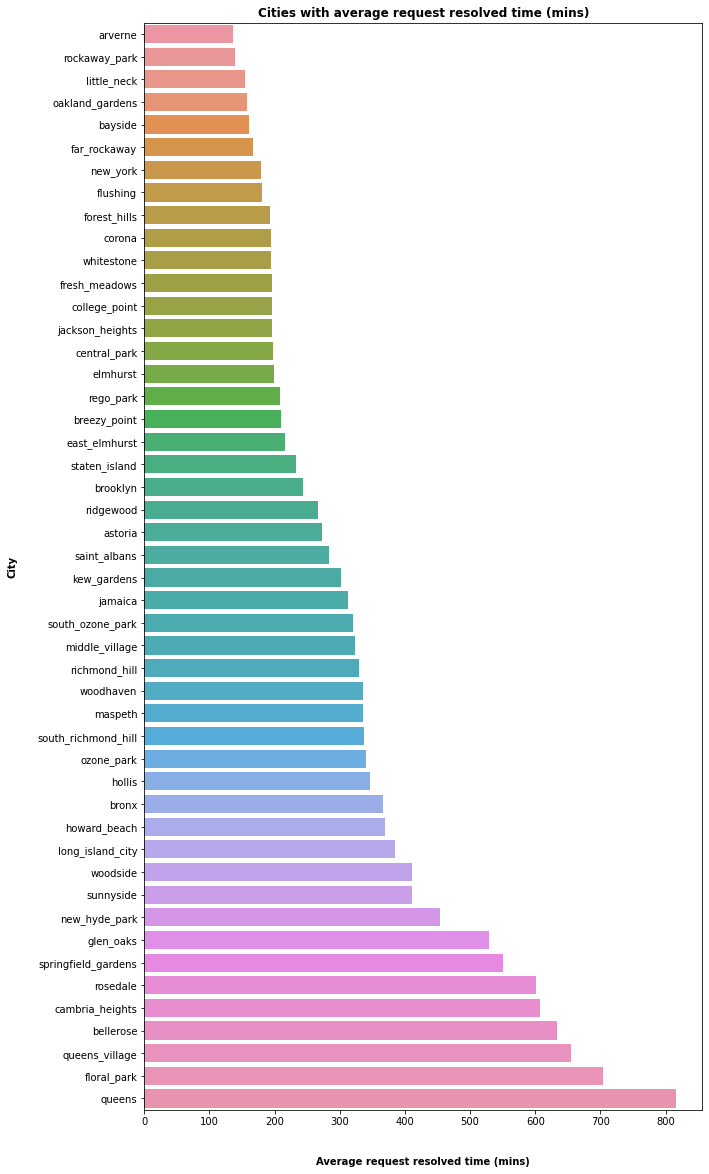

In [25]:
viz1 = nyc[['city','request_closing_time_mins']]
c1 = viz1.groupby('city')['request_closing_time_mins'].mean().to_frame()
c1 = c1.sort_values('request_closing_time_mins')
c1['city'] = c1.index
txt={'weight':'bold'}
plt.figure (figsize=(10,20))
sns.barplot (y='city',x='request_closing_time_mins',data=c1)
plt.title ("Cities with average request resolved time (mins)",fontdict=txt)
plt.ylabel ("City",fontdict=txt,labelpad=20)
plt.xlabel ("Average request resolved time (mins)",fontdict=txt,labelpad=30)
plt.show()

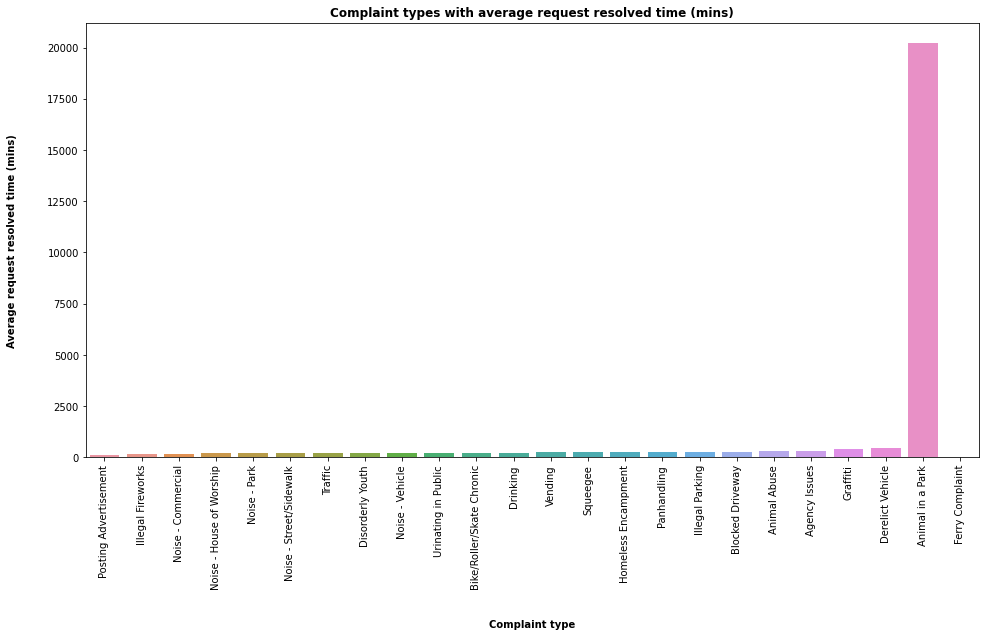

In [26]:
viz2 = nyc[['complaint_type','request_closing_time_mins']]
c2 = viz2.groupby('complaint_type')['request_closing_time_mins'].mean().to_frame()
c2 = c2.sort_values('request_closing_time_mins')
c2['complaint_type'] = c2.index
txt={'weight':'bold'}
plt.figure (figsize=(16,8))
sns.barplot (x='complaint_type',y='request_closing_time_mins',data=c2)
plt.title ("Complaint types with average request resolved time (mins)",fontdict=txt)
plt.xlabel ("Complaint type",fontdict=txt,labelpad=30)
plt.ylabel ("Average request resolved time (mins)",fontdict=txt,labelpad=30)
plt.xticks (rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

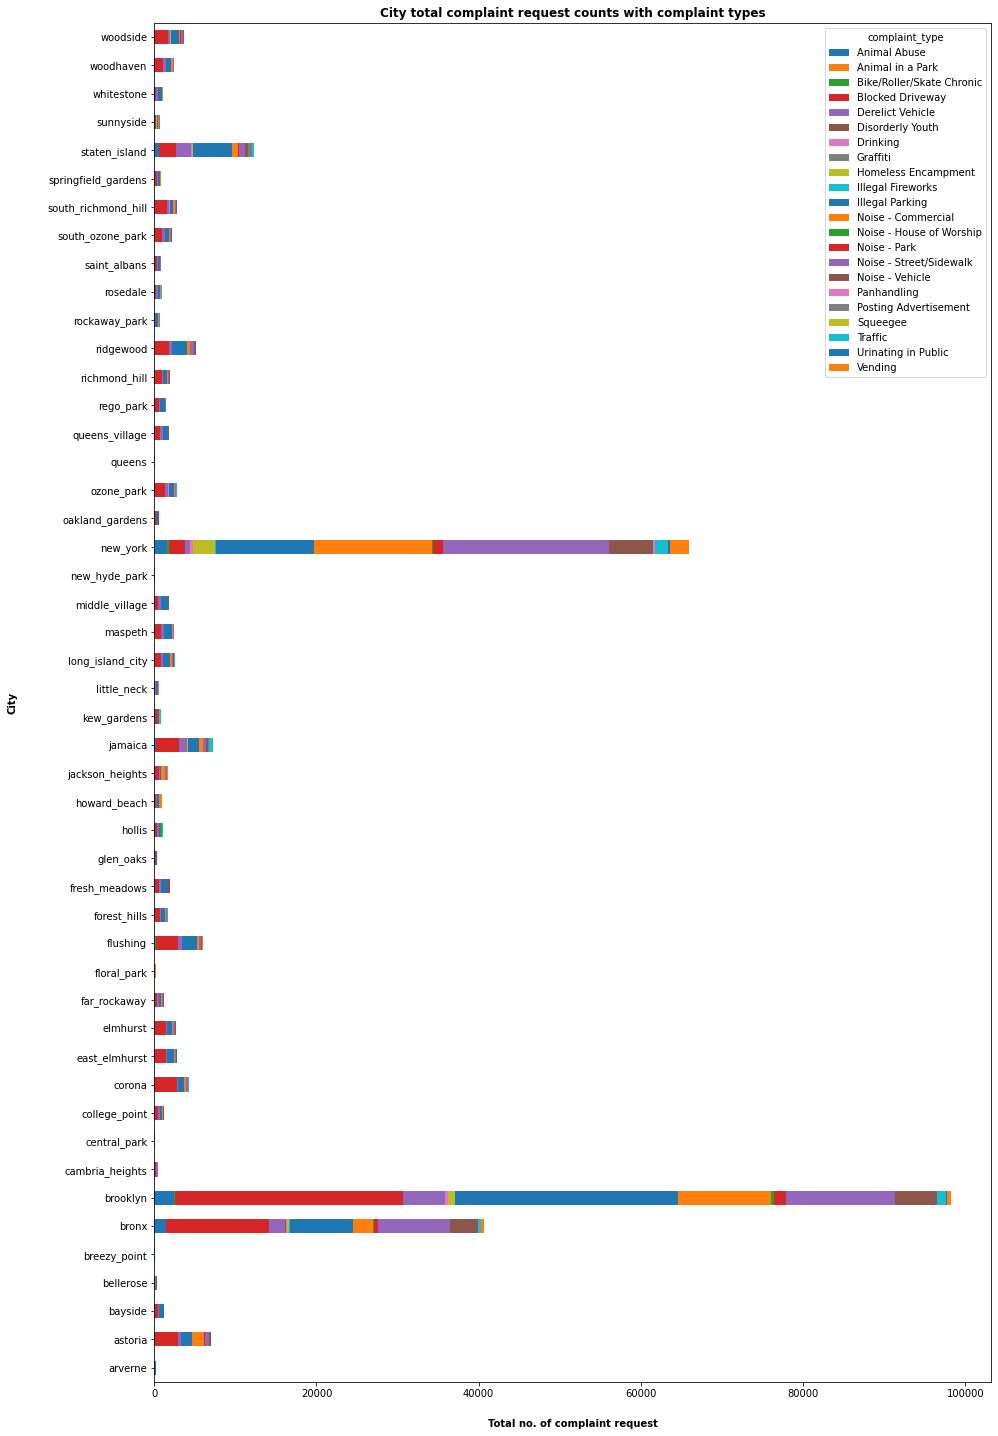

In [27]:
city_complaint_types = pd.crosstab(index=nyc['city'],columns=nyc['complaint_type'])
txt={'weight':'bold'}
plt.figure(figsize=(20,10))
city_complaint_types.plot (kind='barh',figsize=(15,25),stacked=True)
plt.title ("City total complaint request counts with complaint types",fontdict=txt)
plt.xlabel ("Total no. of complaint request",fontdict=txt,labelpad=20)
plt.ylabel ("City",fontdict=txt,labelpad=30)
plt.show()


In [28]:
city_complaintype_group = nyc.groupby(['city','complaint_type'])['request_closing_time_mins'].mean().unstack(level=1)
city_complaintype_group = city_complaintype_group.T
col = city_complaintype_group.columns
for i in col:
    exec("{} = city_complaintype_group['{}'].sort_values()".format(i,i))

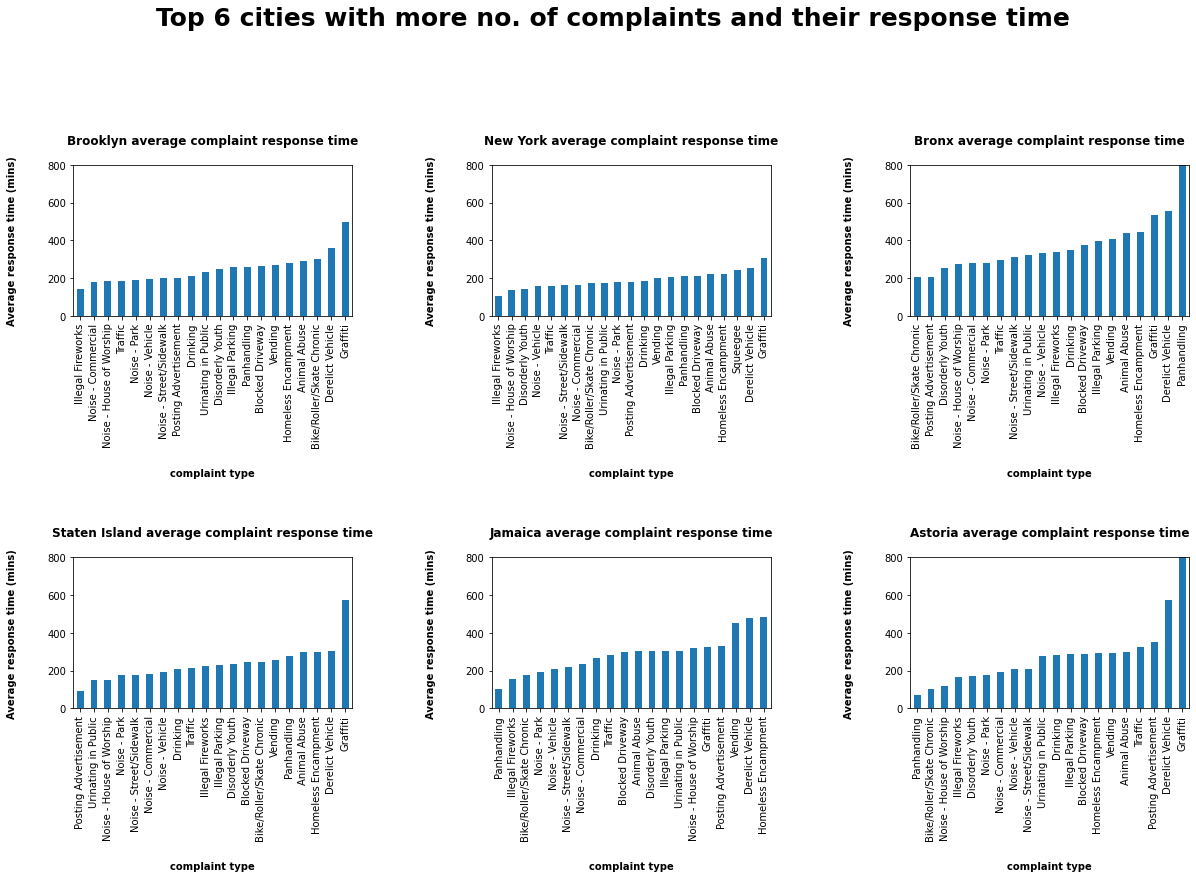

In [29]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.6,wspace=0.5)
plt.suptitle ("Top 6 cities with more no. of complaints and their response time",fontweight="bold",fontsize="25",y=1.1)
txt={'weight':'bold'}
plt.subplot(2,3,1)
plt.title ('Brooklyn average complaint response time',fontdict=txt,y=1.1)
brooklyn.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.subplot(2,3,2)
plt.title ('New York average complaint response time',fontdict=txt,y=1.1)
new_york.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.subplot(2,3,3)
plt.title ('Bronx average complaint response time',fontdict=txt,y=1.1)
bronx.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.subplot(2,3,4)
plt.title ('Staten Island average complaint response time',fontdict=txt,y=1.1)
staten_island.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.subplot(2,3,5)
plt.title ('Jamaica average complaint response time',fontdict=txt,y=1.1)
jamaica.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.subplot(2,3,6)
plt.title ('Astoria average complaint response time',fontdict=txt,y=1.1)
astoria.dropna().plot.bar()
plt.xlabel ('complaint type',fontdict=txt,labelpad=20)
plt.ylabel ('Average response time (mins)',fontdict=txt,labelpad=30)
plt.ylim(0,800)

plt.show()

In [30]:
nyc.dropna (subset=['request_closing_time_hrs','request_closing_time_mins'],inplace=True)

In [31]:
complaints= nyc['complaint_type'].value_counts().index
for i in range(len(complaints)):
    exec("sample{} = nyc.loc[(nyc['complaint_type'] == '{}') , 'request_closing_time_mins']".format(i+1,complaints[i]))

In [34]:
fscore,pvalue = stats.f_oneway(sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19,sample20,sample21)
print("score : {:.2f} , pvalue : {:.2f}".format(fscore,pvalue))

score : 410.86 , pvalue : 0.00


In [35]:
location_complaint_type= pd.crosstab(nyc['complaint_type'],nyc['location'])

In [36]:
cscore,pval,df,et= stats.chi2_contingency(location_complaint_type)
print("score : {:.2f} , pvalue : {:.2f}".format(cscore,pval))

score : 4160841.63 , pvalue : 0.00
